<a href="https://colab.research.google.com/github/ArdaCet/Premier_league_competitions/blob/main/Premiere_League.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import zipfile
from google.colab import files

#  To see through the zip folder and unzip that file.
#with zipfile.ZipFile("/content/drive/My Drive/Scripts/Premiere_Leagure_dataset.zip", 'r') as file_zipped:
  #file_zipped.extractall("/content/drive/My Drive/Scripts")

dt_csv = pd.read_csv("/content/drive/My Drive/Scripts/Extracted_Premier_League_dataset/final_dataset.csv")

In [ ]:
def PremiereLeague_Date():
  date_list = []

  for date in dt_csv["Date"]:
    last_two_digits = date[6:]
    if last_two_digits not in date_list:
      date_list.append(last_two_digits)

  return date_list

In [ ]:
dt_csv

In [ ]:
new_dt_csv = dt_csv.replace({'/2002$' : '/02', '/2003$' : '/03'}, regex = True)

new_dt_csv

In [ ]:
for date in new_dt_csv["Date"]:
  L2D = date[6:]
  if L2D == "2002":
    print(date)

In [ ]:
k= 0

for date in new_dt_csv["Date"]:
  last_two_digits = date[6:]
  if last_two_digits == "2002":
    k = k + 1

print(str(k) + " matches had been played in season 2002")

0 matches had been played in season 2002


In [ ]:
k= 0

for date in dt_csv["Date"]:
  last_two_digits = date[6:]
  if last_two_digits == "17":
    k = k + 1

print(str(k) + " matches had been played in season 17")

401 matches had been played in season 17


In [ ]:
Teams_list = []

for team in dt_csv["HomeTeam"]:
  if team not in Teams_list:
    Teams_list.append(team)
  else:
    continue

c = 0
for num, teams in enumerate(Teams_list):
  c = c + 1
  #print(c, "  ", teams)

print("-------------------------------------------------")
print("There are " + str(c) + " unique teams in the Premiere league from " + str(PremiereLeague_Date()))

-------------------------------------------------
There are 44 unique teams in the Premiere league from ['00', '01', '02', '2002', '2003', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18']


In [ ]:
team_group = dt_csv.groupby("HomeTeam")

total = 0
for teams, team_df in team_group:
  total = total + 1

print(total)

44


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.collections import EventCollection
import numpy as np

In [ ]:
new_dt_csv

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts
0,0,19/08/00,Charlton,Man City,4,0,H,0,0,0,0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,1,19/08/00,Chelsea,West Ham,4,2,H,0,0,0,0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
2,2,19/08/00,Coventry,Middlesbrough,1,3,NH,0,0,0,0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
3,3,19/08/00,Derby,Southampton,2,2,NH,0,0,0,0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4,4,19/08/00,Leeds,Everton,2,0,H,0,0,0,0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,6835,13/05/18,Newcastle,Chelsea,3,0,H,36,62,47,35,1.078947,1.842105,L,L,L,L,W,D,W,W,W,W,38.0,LLLLW,DWWWW,3,13,0,0,0,0,1,0,0,0,-0.289474,0.710526,-0.763158,-0.263158
6836,6836,13/05/18,Southampton,Man City,0,1,NH,37,105,55,27,0.947368,2.552632,W,D,W,D,L,W,D,W,W,W,38.0,WDWDL,WDWWW,8,13,0,0,0,0,1,0,0,0,-0.473684,2.052632,-1.605263,-0.131579
6837,6837,13/05/18,Swansea,Stoke,1,2,NH,27,33,54,67,0.868421,0.789474,L,L,L,L,D,L,D,D,D,L,38.0,LLLLD,LDDDL,1,3,0,0,0,0,0,0,0,0,-0.710526,-0.894737,0.078947,-0.052632
6838,6838,13/05/18,Tottenham,Leicester,5,4,H,69,52,32,55,1.947368,1.236842,W,L,W,D,L,W,L,L,D,L,38.0,WLWDL,WLLDL,7,4,0,0,0,0,0,0,0,0,0.973684,-0.078947,0.710526,0.078947


In [ ]:
total_17 = 0
total_18 = 0

for date in new_dt_csv["Date"]:
  L2D = date[6:]
  if L2D == "17":
    total_17 = total_17 + 1
  elif L2D == "18":
    total_18 = total_18 + 1


total_nrow = len(new_dt_csv)

nrow_18S = (total_nrow - total_18) - 1
nrow_17S = (nrow_18S - total_17) + 1

Premier_League_2017_df = new_dt_csv.loc[nrow_17S : nrow_18S]

In [ ]:
HTname_indexed_df = Premier_League_2017_df.set_index("HomeTeam")

Chelsea_WL_list = HTname_indexed_df.loc["Chelsea", ["FTR"]].values.tolist()
Man_City_WL_list = HTname_indexed_df.loc["Man City", ["FTR"]].values.tolist()

#print(Man_City_WL_list)

C_w = 0
for num, case in enumerate(Chelsea_WL_list):
  for letters in case:
    if letters == "H":
      C_w = C_w + 1
    else:
      continue

M_w = 0
for n, cs in enumerate(Man_City_WL_list):
  for letter in cs:
    if letter == "H":
      M_w = M_w + 1
    else:
      continue

C_w_dic = {}
M_w_dic = {}

C_w_dic["Win"] = C_w
C_w_dic["Lost"] = int(len(Chelsea_WL_list) - C_w)

M_w_dic["Win"] = M_w
M_w_dic["Lost"] = int(len(Man_City_WL_list) - M_w)


print("Chelsea : ", C_w_dic)

print("Manchester City: ", M_w_dic)


Chelsea :  {'Win': 16, 'Lost': 4}
Manchester City:  {'Win': 15, 'Lost': 5}


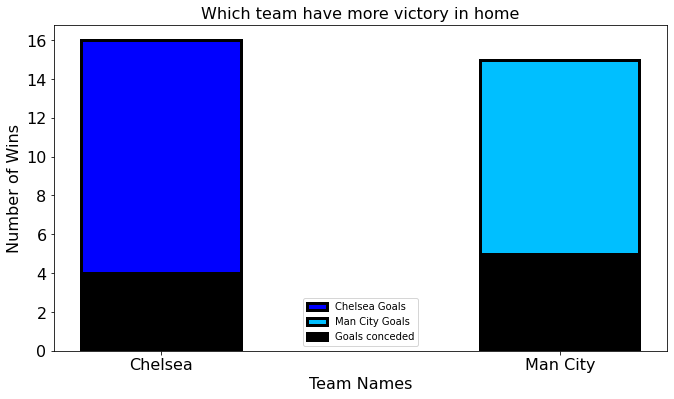

In [ ]:
# plot the data

C_HM_victory = C_w_dic["Win"]
C_HM_losen = C_w_dic["Lost"]
M_HM_victory = M_w_dic["Win"]
M_HM_losen = M_w_dic["Lost"]

C_HM_label = ["Chelsea"]
M_HM_label = ["Man City"]

fig = plt.figure(figsize = (11, 6)) 
fig.patch.set_facecolor('white')

# creating the bar plot 
P1 = plt.bar(C_HM_label, (C_HM_victory, C_HM_losen), color = ('blue', 'k'), edgecolor = ("black"), linewidth = 3, width=0.4, align = "center")
P2 = plt.bar(M_HM_label, (M_HM_victory, M_HM_losen), color = ('deepskyblue', 'k'), edgecolor = ("black"), linewidth = 3, width=0.4, align = "center") 

#ax.set_ylabel('Wins')

plt.xlabel("Team Names", fontsize=16) 
plt.ylabel("Number of Wins", fontsize=16) 
plt.title('Which team have more victory in home', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend((P1[0],P2[0], P1[1]), ("Chelsea Goals", "Man City Goals", "Goals conceded"), fontsize=10)

plt.show()

In [ ]:
import re

In [ ]:
teamss_list = []

for dates in new_dt_csv["Date"]:
  trial = re.search(r'\w+/\w+/00', dates)
  if trial:
    for loop in new_dt_csv["HomeTeam"]:
      if loop not in teamss_list:
        teamss_list.append(loop)

print(teamss_list)
print(len(teamss_list))

['Charlton', 'Chelsea', 'Coventry', 'Derby', 'Leeds', 'Leicester', 'Liverpool', 'Sunderland', 'Tottenham', 'Man United', 'Arsenal', 'Bradford', 'Ipswich', 'Middlesbrough', 'Everton', 'Man City', 'Newcastle', 'Southampton', 'West Ham', 'Aston Villa', 'Bolton', 'Blackburn', 'Fulham', 'Birmingham', 'Middlesboro', 'West Brom', 'Portsmouth', 'Wolves', 'Norwich', 'Crystal Palace', 'Wigan', 'Reading', 'Sheffield United', 'Watford', 'Hull', 'Stoke', 'Burnley', 'Blackpool', 'QPR', 'Swansea', 'Cardiff', 'Bournemouth', 'Brighton', 'Huddersfield']
44


The function called `WhichTeam` signifies how many and which teams were played in a specific Premiere season.


> Just need to type any year starting from 2000 to 2018.



In [ ]:
def WhichTeam():
  teamss_list = []

  value = input("Available seasons are between 2000-2018. Enter any year to get the list of teans played in that season: ")

  if len(value) == 2:

    for index, col_val in new_dt_csv.iterrows():                          #     DataFrame.iterrows() is a generator which yields both the index and row (as a Series)
      dates = col_val[1]
      year = int(dates[-2:])

      if int(value) == year:
        if col_val[2] not in teamss_list:
          teamss_list.append(col_val[2])


  elif len(value) == 4:
    year_input = int(value[-2:])

    for index, col_val in new_dt_csv.iterrows():                          #     DataFrame.iterrows() is a generator which yields both the index and row (as a Series)
      dates = col_val[1]
      year = int(dates[-2:])

      if year == year_input:
        if col_val[2] not in teamss_list:
          teamss_list.append(col_val[2])
  
  print(len(teamss_list), " teams were played in season ", value, " and they were: ")
  return teamss_list

In [ ]:
WhichTeam()